In [1]:
#Open, Plot, and Explore Raster Data with Python 
#https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/open-lidar-raster-python/
#Applied to ASO Snow Off data from Tuolumne Meadows (downloaded from Linux Box Storage)

# Import necessary packages
import os
import rasterio
from rasterio.enums import Resampling
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import numpy as np
import numpy.ma as ma
import pandas as pd
import seaborn as sns
from rasterstats import zonal_stats
import statistics
import scipy.stats as stats
# Use geopandas for vector data and rasterio for raster data
import geopandas as gpd
import rasterio as rio
import rioxarray as riox
# Plotting extent is used to plot raster & vector data together
from rasterio.plot import plotting_extent
from rasterio import features

import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

%matplotlib inline

In [2]:
#set working directory?
os.chdir(os.path.join(et.io.HOME, 
                      'ICESat-2_Snowdepth'))

In [3]:
# Change name of .csv that you read in
atlas_final_df = pd.read_csv('summer_2020_difference.csv')
atlas_final = gpd.GeoDataFrame(atlas_final_df, crs='epsg:32611', geometry=gpd.points_from_xy(atlas_final_df.x, atlas_final_df.y))

In [4]:
atlas_final.head()

,Unnamed: 0,geometry,Track,Unnamed: 0.1,Unnamed: 0.1.1,date,dem_h,h_te_max,h_te_mean,h_te_median,...,latitude,longitude,n_te_photons,segment_snowcover,terrain_slope,x,y,h_aso,slope_aso,difference
0,0,POINT (292729.199 4211039.676),gt3l,211,211,2020-10-06,2738.665283,2710.320068,2705.284668,2705.417480,...,38.023369,-119.361374,20.0,1.0,-0.236910,292729.198514,4.211040e+06,2717.515137,19.842838,-12.097656
1,1,POINT (292715.439 4210920.143),gt3l,212,212,2020-10-06,2710.866211,2698.244385,2689.568115,2690.274170,...,38.022289,-119.361496,42.0,1.0,-0.168018,292715.438922,4.210920e+06,2689.354980,14.679496,0.919189
2,2,POINT (292702.854 4210820.491),gt3l,213,213,2020-10-06,2691.415283,2679.886230,2672.584229,2672.218994,...,38.021389,-119.361610,59.0,1.0,-0.136019,292702.854311,4.210820e+06,2672.952637,11.163389,-0.733643
3,3,POINT (292690.950 4210721.245),gt3l,214,214,2020-10-06,2675.896973,2667.184326,2663.439209,2662.855957,...,38.020493,-119.361717,98.0,1.0,-0.050784,292690.950051,4.210721e+06,2663.604980,5.669123,-0.749023
4,4,POINT (292679.035 4210621.575),gt3l,215,215,2020-10-06,2665.370117,2664.345703,2661.147949,2662.689941,...,38.019592,-119.361824,104.0,1.0,-0.121881,292679.034859,4.210622e+06,2661.804932,9.062229,0.885010


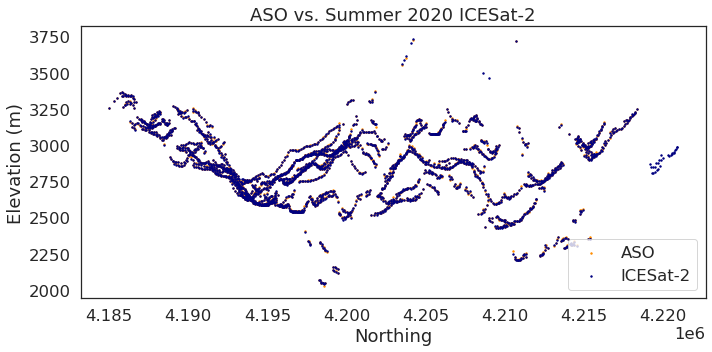

In [5]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(atlas_final['y'],atlas_final['h_aso'], c='darkorange', s=2, label = 'ASO')
ax.scatter(atlas_final['y'],atlas_final['h_te_median'], c='navy', s=2, label = 'ICESat-2')
#ax.set_ylim(1750, 3300)
ax.set_xlabel('Northing')
ax.set_ylabel('Elevation (m)')
ax.set_title('ASO vs. Summer 2020 ICESat-2')
ax.legend(loc = 'lower right')
fig.tight_layout()
plt.savefig('2020_dif_ASO_profile.jpeg', dpi=300)
#ax.set_xlim(4.196*(10**6),4.215*(10**6))

In [ ]:
import matplotlib.pyplot as plt
cm = plt.cm.get_cmap('RdYlBu')
xy = range(20)
z = xy
sc = plt.scatter(xy, xy, c=z, vmin=0, vmax=20, s=35, cmap=cm)
plt.colorbar(sc)
plt.show()

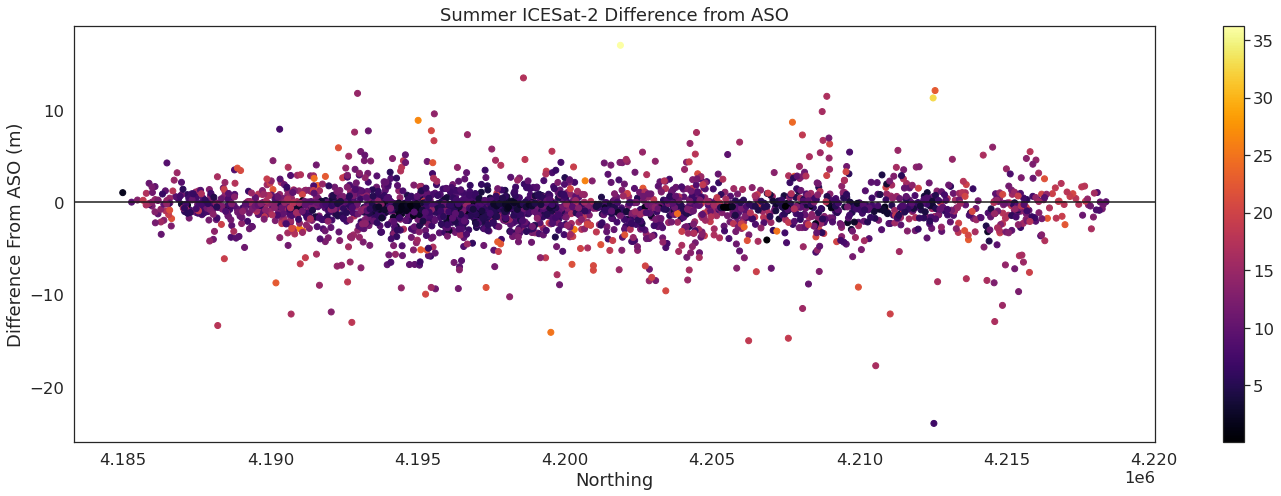

In [15]:
cm = plt.cm.get_cmap('inferno')

fig, ax = plt.subplots(figsize=(20,7))
sc = ax.scatter(atlas_final['y'],atlas_final['difference'], c=atlas_final['slope_aso'], cmap=cm)
ax.axhline(y=0, c='k')

#plt.xlim( 4.19e+06, 4.2176e+06)
#plt.ylim(-6, 3)
plt.xlabel('Northing')
plt.ylabel('Difference From ASO (m)')
plt.title('Summer ICESat-2 Difference from ASO')
plt.colorbar(sc)
plt.tight_layout()
plt.savefig('2020_Dif.jpeg', dpi=300)

In [7]:
# atlas_final[atlas_2020_final['difference'] < (-250)] = np.nan
# atlas_final[atlas_2020_final['difference'] > (250)] = np.nan